In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this


IMAGE_SIZE = [256, 256]

train_path = r'E:\Minor Project\PlantVillage(1)\train'
valid_path = r'E:\Minor Project\PlantVillage(1)\val'

In [3]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [4]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [5]:
from glob import glob
folders = glob(r'E:\Minor Project\PlantVillage(1)\train\*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [7]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
import tensorflow as tf
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 30591 images belonging to 2 classes.


In [12]:
valid_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 9759 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
956/956 [==============================] - 5479s 6s/step - loss: 0.0962 - accuracy: 0.9662 - true_positives: 9592.0000 - true_negatives: 19966.0000 - false_positives: 513.0000 - false_negatives: 520.0000 - precision: 0.9492 - recall: 0.9486 - val_loss: 0.0685 - val_accuracy: 0.9762 - val_true_positives: 2818.0000 - val_true_negatives: 6709.0000 - val_false_positives: 34.0000 - val_false_negatives: 198.0000 - val_precision: 0.9881 - val_recall: 0.9344
Epoch 2/20
956/956 [==============================] - 5522s 6s/step - loss: 0.0230 - accuracy: 0.9919 - true_positives: 9997.0000 - true_negatives: 20345.0000 - false_positives: 134.0000 - false_negatives: 115.0000 - precision: 0.9868 - recall: 0.9886 - val_loss: 0.0462 - val_accuracy: 0.9852 - val_true_positives: 2959.0000 - val_true_negatives: 6656.0000 - val_false_positives: 87.0000 - val_false_negatives: 57.0000 - val_precision: 0.9714 - val_recall: 0.9811
Epoch 3/20
956/956 [==============================] - 5531s 6s/step -

956/956 [==============================] - 5630s 6s/step - loss: 3.9885e-09 - accuracy: 1.0000 - true_positives: 10112.0000 - true_negatives: 20479.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9901 - val_true_positives: 2966.0000 - val_true_negatives: 6696.0000 - val_false_positives: 47.0000 - val_false_negatives: 50.0000 - val_precision: 0.9844 - val_recall: 0.9834
Epoch 19/20
956/956 [==============================] - 5616s 6s/step - loss: 3.1069e-09 - accuracy: 1.0000 - true_positives: 10112.0000 - true_negatives: 20479.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9904 - val_true_positives: 2973.0000 - val_true_negatives: 6692.0000 - val_false_positives: 51.0000 - val_false_negatives: 43.0000 - val_precision: 0.9831 - val_recall: 0.9857
Epoch 20/20
956/956 [==============================] - 5614s 6

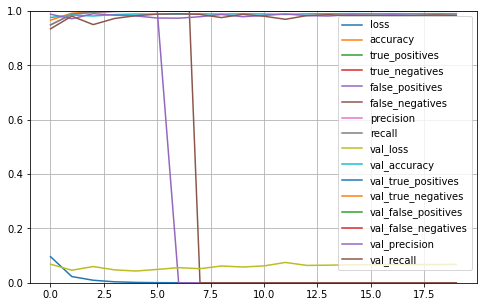

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
from tensorflow.keras.models import load_model

model.save('model_ResNet152V2Retrain.h5')

C:\Users\asus\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [16]:
test_dir = r'E:\Minor Project\PlantVillage(1)\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")

Found 8448 images belonging to 2 classes.


In [17]:
model.evaluate(test_generator)

264/264 [==============================] - 1175s 4s/step - loss: 0.0634 - accuracy: 0.9895 - true_positives: 1923.0000 - true_negatives: 6436.0000 - false_positives: 56.0000 - false_negatives: 33.0000 - precision: 0.9717 - recall: 0.9831


[0.06343682110309601,
 0.9894649386405945,
 1923.0,
 6436.0,
 56.0,
 33.0,
 0.9717028737068176,
 0.9831288456916809]

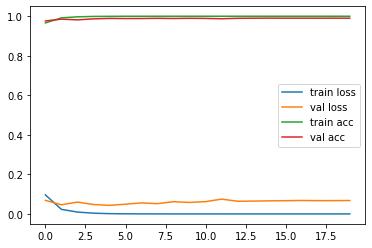

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('loss_acc')